In [59]:
import dgl

from Coarsener.HeteroRGCNCoarsener import HeteroRGCNCoarsener
from Data.ACM import ACM
import dgl.function as fn
import torch
import numpy as np
import torch_geometric
import Data.utils
torch.cuda.empty_cache()


In [55]:
original_graph = g.to('cuda')
coar_graph = g.to('cuda')

In [56]:
from Models.SimpleHeteroGCN import HeteroGCNCiteer    
from Models.ImprovedGCN import ImprovedGCN
from Models.HeteroSGC import HeteroSGC
import importlib
from Models.HeteroSage import HeteroSAGE

from Models.HeteroSGC import HeteroSGCPaper
from Experiments.model_helper import run_experiments
from Experiments.plots import plot_bar, plot_line
orig, coar, loss_ori, loss_coar , _ ,_= run_experiments(original_graph, coar_graph,   HeteroSGCPaper, num_runs=1,
                                                  model_param={"hidden_dim": 64,"num_layers":4,} ,
                        optimizer_param={"lr": 0.001, "weight_decay": 5e-4}, epochs=200,eval_interval=1, target_node_type="paper", device="cuda")
orig_short = [ o[-1] for o in orig ]
coar_short = [ o[-1] for o in coar ]


DGLError: [14:22:47] /opt/dgl/src/runtime/cuda/cuda_device_api.cc:117: Check failed: e == cudaSuccess || e == cudaErrorCudartUnloading: CUDA: out of memory
Stack trace:
  [bt] (0) /scratch/0994359/hetero-conv-matching/.venv/lib64/python3.9/site-packages/dgl/libdgl.so(+0x8b08b5) [0x7ff496df78b5]
  [bt] (1) /scratch/0994359/hetero-conv-matching/.venv/lib64/python3.9/site-packages/dgl/libdgl.so(dgl::runtime::CUDADeviceAPI::AllocDataSpace(DGLContext, unsigned long, unsigned long, DGLDataType)+0x17d) [0x7ff496df91dd]
  [bt] (2) /scratch/0994359/hetero-conv-matching/.venv/lib64/python3.9/site-packages/dgl/libdgl.so(dgl::runtime::NDArray::Empty(std::vector<long, std::allocator<long> >, DGLDataType, DGLContext)+0x170) [0x7ff496c715a0]
  [bt] (3) /scratch/0994359/hetero-conv-matching/.venv/lib64/python3.9/site-packages/dgl/libdgl.so(dgl::aten::NewIdArray(long, DGLContext, unsigned char)+0x6d) [0x7ff49688300d]
  [bt] (4) /scratch/0994359/hetero-conv-matching/.venv/lib64/python3.9/site-packages/dgl/libdgl.so(std::pair<dgl::runtime::NDArray, dgl::runtime::NDArray> dgl::aten::impl::Sort<(DGLDeviceType)2, long>(dgl::runtime::NDArray, int)+0x80) [0x7ff496e24d90]
  [bt] (5) /scratch/0994359/hetero-conv-matching/.venv/lib64/python3.9/site-packages/dgl/libdgl.so(dgl::aten::Sort(dgl::runtime::NDArray, int)+0x46a) [0x7ff49689c91a]
  [bt] (6) /scratch/0994359/hetero-conv-matching/.venv/lib64/python3.9/site-packages/dgl/libdgl.so(void dgl::aten::impl::COOSort_<(DGLDeviceType)2, long>(dgl::aten::COOMatrix*, bool)+0x394) [0x7ff496e293b4]
  [bt] (7) /scratch/0994359/hetero-conv-matching/.venv/lib64/python3.9/site-packages/dgl/libdgl.so(dgl::aten::COOSort_(dgl::aten::COOMatrix*, bool)+0x1c4) [0x7ff4968912d4]
  [bt] (8) /scratch/0994359/hetero-conv-matching/.venv/lib64/python3.9/site-packages/dgl/libdgl.so(dgl::aten::COOSort(dgl::aten::COOMatrix, bool)+0x530) [0x7ff496e26c60]



In [2]:
dataset = ACM() 
original_graph = dataset.load_graph(n_components=30)
device= "cuda:1"
original_graph = original_graph.to(device)
original_graph = Data.utils.create_random_mask(original_graph, device=device, target_ntype="paper") 

In [57]:
original_graph

Graph(num_nodes={'author': 1134649, 'field_of_study': 59965, 'institution': 8740, 'paper': 736389},
      num_edges={('author', 'authortoinstitution', 'institution'): 1043998, ('author', 'authortopaper', 'paper'): 7145660, ('paper', 'papertofield_of_study', 'field_of_study'): 7505078, ('paper', 'papertopaper', 'paper'): 5416271},
      metagraph=[('author', 'institution', 'authortoinstitution'), ('author', 'paper', 'authortopaper'), ('paper', 'field_of_study', 'papertofield_of_study'), ('paper', 'paper', 'papertopaper')])

In [61]:

num_nearest_init_neighbors_per_type =  {"author": 50, "authortopaper": 50, "paper":50, "papertopaper":50,"papertopaper":50, "papertoauthor":50, "author":50 , "papertofield_of_study":50, "field_of_study": 50, "authortoinstitution":50, "institution":50, "field_of_studytopaper":50, "institutiontoauthor":50 }
from Projections.CCA import CCA
coarsener = HeteroRGCNCoarsener(original_graph, num_nearest_init_neighbors_per_type, use_zscore=False,device='cuda:1',
                                cca_cls=CCA, batch_size=None, checkpoints=[0.999, 0.5, 0.3,0.1], folder_name="omg",
                                pairs_per_level=5,norm_p=1, approx_neigh=True, add_feat=True, use_out_degree=False) 

coarsener.init()

coarsener.summarize()

/scratch/0994359/hetero-conv-matching/.venv/lib64/python3.9/site-packages/dgl/transforms/functional.py:1366: DGLWarning: share_ndata argument has been renamed to copy_ndata.
  dgl_warning("share_ndata argument has been renamed to copy_ndata.")


DGLError: [14:28:13] /opt/dgl/src/array/cuda/./spmm.cuh:724: Check failed: e == cudaSuccess || e == cudaErrorCudartUnloading: CUDA kernel launch error: out of memory
Stack trace:
  [bt] (0) /scratch/0994359/hetero-conv-matching/.venv/lib64/python3.9/site-packages/dgl/libdgl.so(+0x11e9fff) [0x7ff497730fff]
  [bt] (1) /scratch/0994359/hetero-conv-matching/.venv/lib64/python3.9/site-packages/dgl/libdgl.so(void dgl::aten::cuda::SpMMCsr<long, float, dgl::aten::cuda::binary::CopyRhs<float>, dgl::aten::cuda::reduce::Sum<long, float, false> >(dgl::BcastOff const&, dgl::aten::CSRMatrix const&, dgl::runtime::NDArray, dgl::runtime::NDArray, dgl::runtime::NDArray, dgl::runtime::NDArray, dgl::runtime::NDArray)+0x790) [0x7ff4977c01e0]
  [bt] (2) /scratch/0994359/hetero-conv-matching/.venv/lib64/python3.9/site-packages/dgl/libdgl.so(void dgl::aten::SpMMCsr<2, long, float>(std::string const&, std::string const&, dgl::BcastOff const&, dgl::aten::CSRMatrix const&, dgl::runtime::NDArray, dgl::runtime::NDArray, dgl::runtime::NDArray, std::vector<dgl::runtime::NDArray, std::allocator<dgl::runtime::NDArray> >)+0xe7f) [0x7ff4977cc9af]
  [bt] (3) /scratch/0994359/hetero-conv-matching/.venv/lib64/python3.9/site-packages/dgl/libdgl.so(dgl::aten::SpMM(std::string const&, std::string const&, std::shared_ptr<dgl::BaseHeteroGraph>, dgl::runtime::NDArray, dgl::runtime::NDArray, dgl::runtime::NDArray, std::vector<dgl::runtime::NDArray, std::allocator<dgl::runtime::NDArray> >)+0x181a) [0x7ff496bf138a]
  [bt] (4) /scratch/0994359/hetero-conv-matching/.venv/lib64/python3.9/site-packages/dgl/libdgl.so(+0x6cb959) [0x7ff496c12959]
  [bt] (5) /scratch/0994359/hetero-conv-matching/.venv/lib64/python3.9/site-packages/dgl/libdgl.so(+0x6cc021) [0x7ff496c13021]
  [bt] (6) /scratch/0994359/hetero-conv-matching/.venv/lib64/python3.9/site-packages/dgl/libdgl.so(DGLFuncCall+0x48) [0x7ff496c55278]
  [bt] (7) /scratch/0994359/hetero-conv-matching/.venv/lib64/python3.9/site-packages/dgl/_ffi/_cy3/core.cpython-39-x86_64-linux-gnu.so(+0x16a73) [0x7ff45a566a73]
  [bt] (8) /scratch/0994359/hetero-conv-matching/.venv/lib64/python3.9/site-packages/dgl/_ffi/_cy3/core.cpython-39-x86_64-linux-gnu.so(+0x1709b) [0x7ff45a56709b]



In [22]:
X =coarsener.summarized_graph.nodes['author'].data['feat_pca']
Y = coarsener.summarized_graph.nodes['author'].data["hauthortopaper"]

In [21]:
coarsener.summarized_graph.nodes['author'].data.keys()

dict_keys(['feat_pca', 'feat', 'node_size', 'deg_authortopaper', 'deg_papertoauthor', 'sauthortopaper', 'hauthortopaper', 'iauthortopaper'])

In [23]:
coarsener.summarized_graph.nodes['paper']
X_c, Y_c = coarsener.ccas['authortopaper'].transform(X,Y)
X_c, Y_c = X_c.to('cpu'), Y_c.to('cpu')
canonical_corrs = [np.corrcoef(X_c[:, i], Y_c[:, i])[0, 1] for i in range(2)]
print("Canonical Correlations:", canonical_corrs)

Canonical Correlations: [0.8955351456160081, 0.940887152016704]


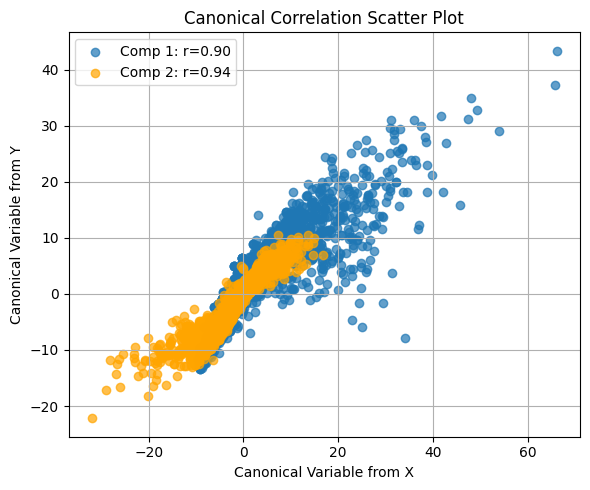

In [25]:

import matplotlib.pyplot as plt
# Scatter plot of canonical variates
plt.figure(figsize=(6, 5))
plt.scatter(X_c[:, 0], Y_c[:, 0], label=f"Comp 1: r={canonical_corrs[0]:.2f}", alpha=0.7)
plt.scatter(X_c[:, 1], Y_c[:, 1], label=f"Comp 2: r={canonical_corrs[1]:.2f}", alpha=0.7, color='orange')
plt.xlabel("Canonical Variable from X")
plt.ylabel("Canonical Variable from Y")
plt.title("Canonical Correlation Scatter Plot")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [3]:

import pickle
with open(f'results/ACM_CCA_pca_30/0.1', 'rb') as fh:
        
    coarsener = pickle.load(fh) 

In [26]:

import pickle
with open(f'ugc.pt', 'rb') as fh:
        
    data = torch.load(fh) 

In [20]:
data.device

AttributeError: 'HeteroData' has no attribute 'device'

In [24]:
from torch_geometric.data import HeteroData


# ... your existing graph setup
edge_index_dict = {}
for edge_type in data.edge_types:
    src_type, relation_type, dst_type = edge_type
    edge_index = data[edge_type].edge_index
    edge_index_dict[(src_type, relation_type, dst_type)] = edge_index
import dgl
import torch

# Compute number of nodes per node type
num_nodes_dict = {ntype: data[ntype].num_nodes for ntype in data.node_types}

# Convert edge_index_dict to DGL format
dgl_graph = dgl.heterograph({
    (src, src +rel+dst , dst): (edge_index[0], edge_index[1])
    for (src, rel, dst), edge_index in edge_index_dict.items()
}, num_nodes_dict=num_nodes_dict)
for ntype in data.node_types:
    for key, value in data[ntype].items():
        if key == 'x':
            dgl_graph.nodes[ntype].data['feat'] = value
        else:
            dgl_graph.nodes[ntype].data[key] = value

for ntype in data.node_types:
    for key, value in data[ntype].items():
        # This includes x, y, train_mask, val_mask, test_mask, etc.
        dgl_graph.nodes[ntype].data[key] = value
dgl_graph.nodes['paper'].data['label'] = dgl_graph.nodes['paper'].data['y']
dgl_graph.nodes['paper'].data['test_mask'] = ~dgl_graph.nodes['paper'].data['train_mask']
#dgl_graph = dgl_graph.to(device)

In [9]:
dgl_graph.nodes['paper'].data['feat'].shape

torch.Size([1066, 1902])

In [25]:
dgl_graph.device

device(type='cpu')

In [73]:
import torch
coarsend_graph = coarsener.summarized_graph
coarsend_graph = coarsend_graph.to(device)
#coarsend_graph = coarsend_graph.cpu()
mapping = coarsener.get_mapping("paper")
coarsener.make_mask(mapping, "paper")

labels = coarsener.get_labels(mapping, "paper")
coarsend_graph.nodes["paper"].data["label"] = torch.tensor([labels[i] for i in range(len(labels)) ],  device=device) #,
print("ratio", coarsend_graph.num_nodes()/ original_graph.num_nodes() ) 


ratio 0.09952476695302503


In [12]:
original_graph.nodes['term'].data['feat'].shape

torch.Size([1902, 1])

In [78]:
coarsend_graph

Graph(num_nodes={'author': 596, 'paper': 300, 'subject': 5, 'term': 188},
      num_edges={('author', 'authortopaper', 'paper'): 3647, ('paper', 'papertoauthor', 'author'): 3647, ('paper', 'papertopaper', 'paper'): 3247, ('paper', 'papertosubject', 'subject'): 430, ('paper', 'papertoterm', 'term'): 49722, ('subject', 'subjecttopaper', 'paper'): 430, ('term', 'termtopaper', 'paper'): 49722},
      metagraph=[('author', 'paper', 'authortopaper'), ('paper', 'author', 'papertoauthor'), ('paper', 'paper', 'papertopaper'), ('paper', 'subject', 'papertosubject'), ('paper', 'term', 'papertoterm'), ('subject', 'paper', 'subjecttopaper'), ('term', 'paper', 'termtopaper')])

In [80]:
dgl_graph

Graph(num_nodes={'author': 1867, 'paper': 1066, 'subject': 23, 'term': 317},
      num_edges={('author', 'authortopaper', 'paper'): 26581, ('paper', 'papertoauthor', 'author'): 26581, ('paper', 'papertopaper', 'paper'): 9704, ('paper', 'papertosubject', 'subject'): 818, ('paper', 'papertoterm', 'term'): 72979, ('subject', 'subjecttopaper', 'paper'): 818, ('term', 'termtopaper', 'paper'): 72979},
      metagraph=[('author', 'paper', 'authortopaper'), ('paper', 'author', 'papertoauthor'), ('paper', 'paper', 'papertopaper'), ('paper', 'subject', 'papertosubject'), ('paper', 'term', 'papertoterm'), ('subject', 'paper', 'subjecttopaper'), ('term', 'paper', 'termtopaper')])

In [75]:
coarsend_graph.nodes['paper'].data['label'].shape

torch.Size([300])

In [76]:
dgl_graph.nodes['paper'].data['label'].shape

torch.Size([1066])

In [15]:
from Models.SimpleHeteroGCN import HeteroGCNCiteer    
from Models.ImprovedGCN import ImprovedGCN
from Models.HeteroSGC import HeteroSGC
import importlib
from Models.HeteroSage import HeteroSAGE

from Models.HeteroSGC import HeteroSGCPaper
from Experiments.model_helper import run_experiments
from Experiments.plots import plot_bar, plot_line
orig, coar, loss_ori, loss_coar , _ ,_= run_experiments(original_graph, dgl_graph,   HeteroSGCPaper, num_runs=1,
                                                  model_param={"hidden_dim": 64,"num_layers":4,} ,
                        optimizer_param={"lr": 0.001, "weight_decay": 5e-4}, epochs=200,eval_interval=1, target_node_type="paper", device="cuda:1")
orig_short = [ o[-1] for o in orig ]
coar_short = [ o[-1] for o in coar ]


In [16]:
max(orig[0]), max(coar[0])

(0.9272727272727272, 0.7239669421487603)